# Music Genre Classification using Neural Network
This notebook builds a neural network to classify music genres based on MFCC data.

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import platform

import utils

In [15]:
# Enable GPU acceleration (Metal for macOS, CUDA for PC, fallback to CPU)
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
        if tf.test.is_built_with_cuda():
            print(f"CUDA is enabled. Using GPU(s) with CUDA: {physical_devices}")
        elif platform.system() == 'Darwin':
            print(f"Metal is enabled. Using Metal-enabled GPU on macOS: {physical_devices}")
        else:
            print(f"GPU detected but neither CUDA nor Metal is enabled: {physical_devices}")
    except RuntimeError as e:
        print(f"Error enabling GPU acceleration: {e}")
else:
    print("No GPU found. Running on CPU.")

Metal is enabled. Using Metal-enabled GPU on macOS: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
# Load MFCC data
mfcc_df = utils.load_mfcc_data()
labels = pd.read_csv('project_data/tracks.csv')['genre']

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Drop non-numeric columns
mfcc_df = mfcc_df.drop(columns=['file_name'])

# Flatten multi-index columns and scale features
mfcc_df.columns = ['_'.join(map(str, col)) for col in mfcc_df.columns]
scaler = StandardScaler()
X = scaler.fit_transform(mfcc_df)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/var/folders/42/12p7rrgx3zj15zz7yc0tm30w0000gn/T/ipykernel_30084/580235025.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  mfcc_df = mfcc_df.drop(columns=['file_name'])


In [17]:
# Build the neural network
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/Users/lukasz/GitHub/Music-Classification/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2500 - loss: 2.2712 - val_accuracy: 0.4500 - val_loss: 1.4272
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4432 - loss: 1.5717 - val_accuracy: 0.5625 - val_loss: 1.2403
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4803 - loss: 1.4136 - val_accuracy: 0.6125 - val_loss: 1.1374
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5585 - loss: 1.2905 - val_accuracy: 0.6313 - val_loss: 1.0960
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5131 - loss: 1.2396 - val_accuracy: 0.5938 - val_loss: 1.0826
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5395 - loss: 1.2670 - val_accuracy: 0.5813 - val_loss: 1.0645
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5790 - loss: 1.2434 - val_accuracy: 0.6313 - val_loss: 1.0172
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5681 - loss: 1.3046 - val_accuracy: 0.6062 - v

In [19]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6681 - loss: nan     
Test Accuracy: 65.00%


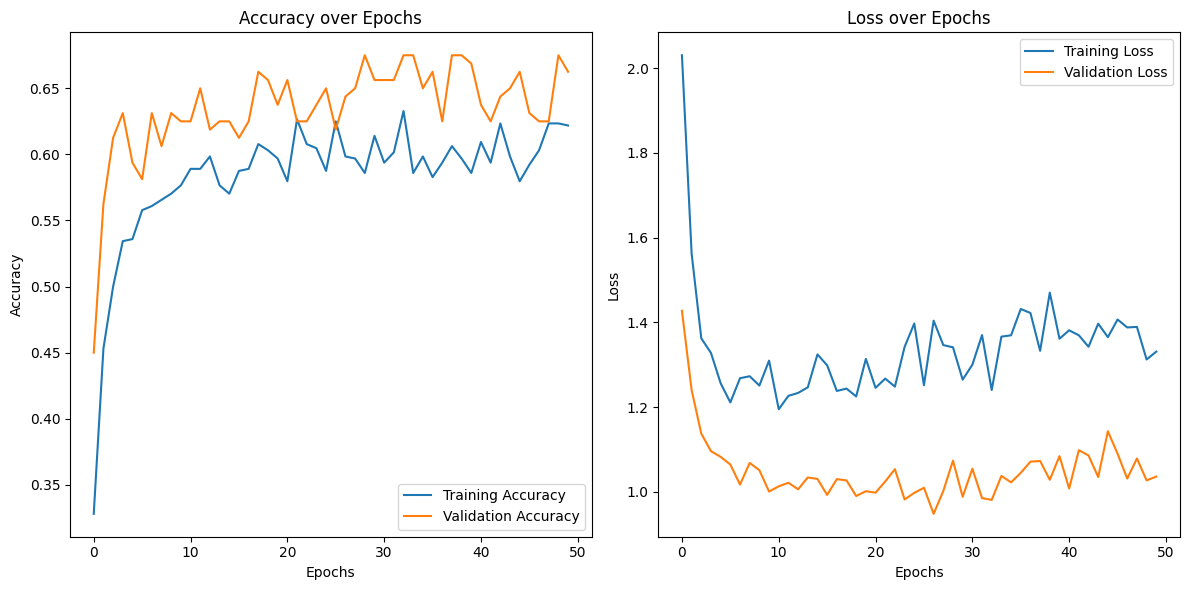

In [20]:
# Visualize training results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Display test data and predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

for i in range(10):  # Display the first 10 test samples
    print(f"Test Sample {i}: True Label = {label_encoder.inverse_transform([y_test[i]])[0]}, Predicted Label = {label_encoder.inverse_transform([predicted_classes[i]])[0]}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Test Sample 0: True Label = jazz, Predicted Label = jazz
Test Sample 1: True Label = pop, Predicted Label = pop
Test Sample 2: True Label = pop, Predicted Label = pop
Test Sample 3: True Label = metal, Predicted Label = metal
Test Sample 4: True Label = hiphop, Predicted Label = disco
Test Sample 5: True Label = metal, Predicted Label = metal
Test Sample 6: True Label = metal, Predicted Label = metal
Test Sample 7: True Label = jazz, Predicted Label = jazz
Test Sample 8: True Label = reggae, Predicted Label = reggae
Test Sample 9: True Label = classical, Predicted Label = classical
